In [218]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
import collections
from scipy import stats

In [219]:
df_2004 = pd.read_csv("./datascience/datasets/airports/2004.csv")

In [220]:
df_2004.shape #original set over 7 million records

(7129270, 29)

In [221]:
df_2004.head() #first 5 rows of dataset

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2004,1,12,1,623.0,630,901.0,915,UA,462,...,7,11,0,NaN,0,0,0,0,0,0
1,2004,1,13,2,621.0,630,911.0,915,UA,462,...,16,16,0,NaN,0,0,0,0,0,0
2,2004,1,14,3,633.0,630,920.0,915,UA,462,...,4,15,0,NaN,0,0,0,0,0,0
3,2004,1,15,4,627.0,630,859.0,915,UA,462,...,4,10,0,NaN,0,0,0,0,0,0
4,2004,1,16,5,635.0,630,918.0,915,UA,462,...,3,13,0,NaN,0,0,0,0,0,0


In [222]:
df_2004 = df_2004.query("Dest == 'MCO'") #filter data by destination MCO

In [223]:
df_2004.shape #108763 records

(108763, 29)

In [224]:
df_2005 = pd.read_csv("./datascience/datasets/airports/2005.csv")

In [225]:
df_2005 = df_2005.query("Dest == 'MCO'") #filter data by destination MCO

In [226]:
df_2006 = pd.read_csv("./datascience/datasets/airports/2006.csv")

In [227]:
df_2006 = df_2006.query("Dest == 'MCO'") #filter data by destination MCO

In [228]:
df_2007 = pd.read_csv("./datascience/datasets/airports/2007.csv")

In [229]:
df_2007 = df_2007.query("Dest == 'MCO'") #filter data by destination MCO

In [230]:
df_2008 = pd.read_csv("./datascience/datasets/airports/2008.csv")

In [231]:
df_2008 = df_2008.query("Dest == 'MCO'") #filter data by destination MCO

In [232]:
df_2008

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
10,2008,1,3,4,706.0,700,916.0,915,WN,100,...,5.0,19.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
11,2008,1,3,4,1644.0,1510,1845.0,1725,WN,1333,...,6.0,8.0,0,NaN,0,8.0,0.0,0.0,0.0,72.0
30,2008,1,3,4,2107.0,1945,2334.0,2230,WN,362,...,6.0,7.0,0,NaN,0,5.0,0.0,0.0,0.0,59.0
31,2008,1,3,4,1008.0,1005,1234.0,1255,WN,543,...,5.0,6.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
32,2008,1,3,4,712.0,710,953.0,1000,WN,1112,...,5.0,14.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
33,2008,1,3,4,1312.0,1300,1546.0,1550,WN,1397,...,7.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
34,2008,1,3,4,1449.0,1430,1715.0,1720,WN,3398,...,6.0,6.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
35,2008,1,3,4,1634.0,1555,1859.0,1845,WN,3480,...,5.0,6.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
53,2008,1,3,4,1038.0,945,1314.0,1225,WN,1035,...,8.0,7.0,0,NaN,0,7.0,0.0,0.0,0.0,42.0
161,2008,1,3,4,1319.0,1300,2033.0,2025,WN,380,...,6.0,14.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [233]:
df = pd.concat([df_2004, df_2005, df_2006, df_2007, df_2008]) #Join all datasets from 2004-2008

In [234]:
df.to_csv("./datascience/datasets/airports/mco_flights.csv", index = False) #save orlando data to csv

In [271]:
df = pd.read_csv("./datascience/datasets/airports/mco_flights.csv")

In [272]:
df.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [273]:
df['Year'] = df['Year'].astype(str)
df['Month'] = df['Month'].astype(str)
df['DayofMonth'] = df['DayofMonth'].astype(str)

In [274]:
df['Date'] = df['Month']  + "/" + df['DayofMonth'] + "/" + df['Year']

In [275]:
df['Year'] = df['Year'].astype(int)
df['Month'] = df['Month'].astype(int)
df['DayofMonth'] = df['DayofMonth'].astype(int)

In [276]:
df['Date'] = pd.to_datetime(df['Date'])

In [277]:
df['Date'][:5]

0   2004-01-01
1   2004-01-02
2   2004-01-03
3   2004-01-04
4   2004-01-05
Name: Date, dtype: datetime64[ns]

In [278]:
months = ['','Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

In [279]:
monthly_2004 = df.query("Year == '2004'").groupby("Month")['Year'].count()
monthly_2005 = df.query("Year == '2005'").groupby("Month")['Year'].count()
monthly_2006 = df.query("Year == '2006'").groupby("Month")['Year'].count()
monthly_2007 = df.query("Year == '2007'").groupby("Month")['Year'].count()
monthly_2008 = df.query("Year == '2008'").groupby("Month")['Year'].count()
monthly_total = df.groupby('Year')['Year'].count()

In [280]:
years = df.groupby(["Year", "Month"])["Year"].count()
years

Year  Month
2004  1         8506
      2         8338
      3         9127
      4         8953
      5         8891
      6         8835
      7         9272
      8         9356
      9         8336
      10        9327
      11        9669
      12       10153
2005  1        10179
      2         9295
      3        10588
      4        10049
      5         9698
      6         9617
      7        10202
      8        10000
      9         8844
      10        9814
      11       10037
      12       10421
2006  1        10095
      2         9373
      3        10765
      4        10501
      5        10149
      6         9776
      7        10181
      8         9968
      9         8956
      10        9596
      11        9484
      12       10072
2007  1        10279
      2         9678
      3        11240
      4        10967
      5        11033
      6        10964
      7        11547
      8        11427
      9         9918
      10       10592
      11       10717
 

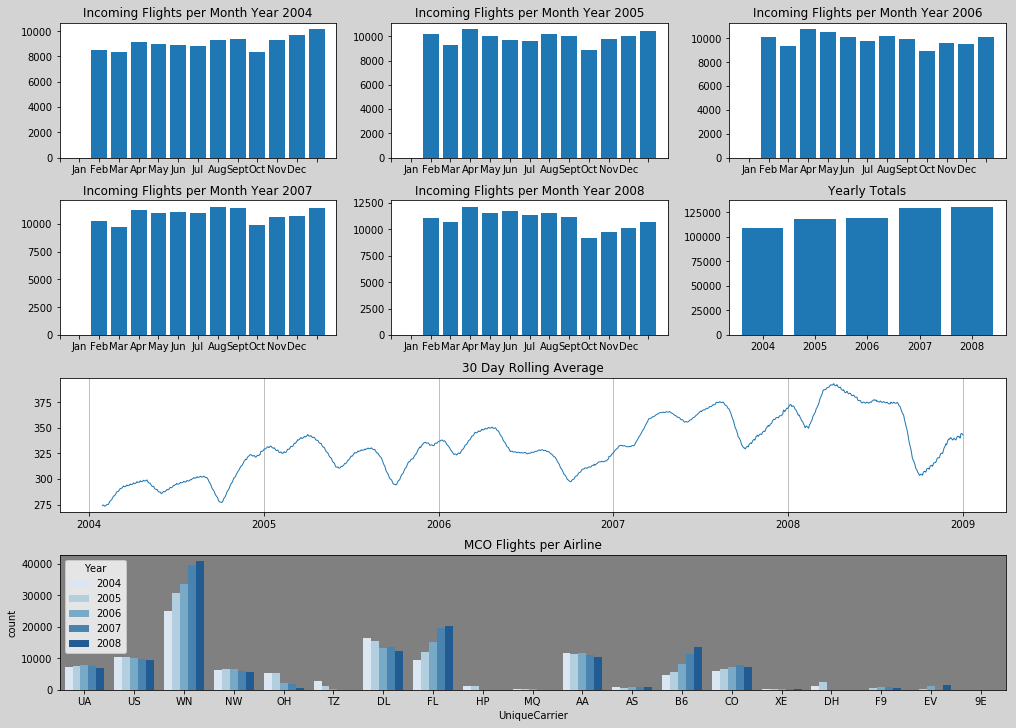

In [281]:
fig = plt.figure(constrained_layout = True, figsize = (14, 10), facecolor = 'lightgrey')
gs = GridSpec(4, 3, figure=fig)


ax1 = fig.add_subplot(gs[0, -3])
ax2 = fig.add_subplot(gs[0, -2])
ax3 = fig.add_subplot(gs[0, -1])
ax4 = fig.add_subplot(gs[1, -3])
ax5 = fig.add_subplot(gs[1, -2])
ax6 = fig.add_subplot(gs[1, -1])
ax7 = fig.add_subplot(gs[2, :])
ax8 = fig.add_subplot(gs[3, :])



ax1.bar(monthly_2004.index, monthly_2004.values)
ax1.set_xticks([i for i in range(-1, len(months))])
ax1.set_xticklabels([i for i in months]);
ax1.set_title("Incoming Flights per Month Year 2004")

ax2.bar(monthly_2005.index, monthly_2005.values)
ax2.set_xticks([i for i in range(-1, len(months))])
ax2.set_xticklabels([i for i in months]);
ax2.set_title("Incoming Flights per Month Year 2005")

ax3.bar(monthly_2006.index, monthly_2006.values)
ax3.set_xticks([i for i in range(-1, len(months))])
ax3.set_xticklabels([i for i in months]);
ax3.set_title("Incoming Flights per Month Year 2006")

ax4.bar(monthly_2007.index, monthly_2007.values)
ax4.set_xticks([i for i in range(-1, len(months))])
ax4.set_xticklabels([i for i in months]);
ax4.set_title("Incoming Flights per Month Year 2007")

ax5.bar(monthly_2008.index, monthly_2008.values)
ax5.set_xticks([i for i in range(-1, len(months))])
ax5.set_xticklabels([i for i in months]);
ax5.set_title("Incoming Flights per Month Year 2008")

ax6.bar(monthly_total.index, monthly_total.values)
ax6.set_xticks(monthly_total.index)
ax6.set_xticklabels(['2004', '2005', '2006', '2007', '2008']);
ax6.set_title("Yearly Totals")

ax7.plot(df.groupby("Date")['Year'].count().rolling(30).mean(), linewidth = 1)
ax7.set_title("30 Day Rolling Average")
ax7.grid(axis = 'x')

ticks = [0.1, 0.3, 1, 3, 10,30, 100, 300, 1000, 3000, 10000, 30000, 100000, 300000]

sns.countplot(data = df, x = df['UniqueCarrier'], hue = 'Year', dodge = True,  color = 'jet',palette = "Blues", ax = ax8)
ax8.set_title('MCO Flights per Airline')
ax8.set_facecolor("grey")


Text(0.5,1,'Daily In-Bound Flights Regression 2004-2008')

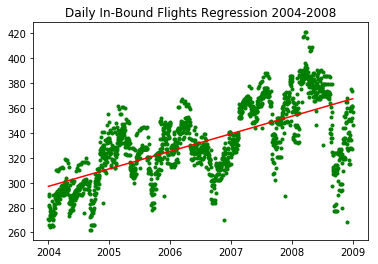

In [282]:
x = [i for i in range(1827)]
y = list(collections.Counter(df['Date']).values())
gradient, intercept, r_value, p_value, std_err = stats.linregress(x,y)
mn=np.min(x)
mx=np.max(x)
x1=np.linspace(mn,mx,500)
y1=gradient*x1+intercept

plt.plot(x,y, 'g.')
plt.plot(x1,y1,'-r')
plt.xticks([i for i in x][::365], [2004, 2005, 2006, 2007, 2008, 2009])
plt.title("Daily In-Bound Flights Regression 2004-2008")

# Perform chi square tests on monthly flights to determine if these fluctuations are by natural variation or are statistically significant

Null Hypothesis: The month of year has no effect on the amount of inbound flights to Orlando

Alternative Hypothesis: The month of year does have a statistical significane in the amount of flights in bound to Orlando

$N_o:  N_o = N_1$

$N_1: N_o \neq N_1$

In [283]:
#custom function
def chi_square(array):
    
    chi_table = {1: 3.841, 2: 5.991, 3: 7.815, 4: 9.488, 5: 11.071, 6: 12.592, 
             7: 14.067, 8: 15.507, 9: 16.919, 10: 18.307, 11: 19.675}
    
    total = sum(array)
    df = len(array)-1
    percent = 1/len(array)#assume even distribution
    expected = [total*percent for i in array] #compute expected values
    stat = np.sum((array - expected)**2/expected)#Compute chi statistic
    if stat > chi_table[df]:
        print(f"Reject Null Hypothesis. \n")
        print(f"Chi-Statistic = {stat} \n")
        print(f"Alpha Threshold = {chi_table[df]}")
    else:
        return("Fail to Reject Null Hypothesis")

In [284]:
chi_square(monthly_2004.values)

Reject Null Hypothesis. 

Chi-Statistic = 354.9065307135699 

Alpha Threshold = 19.675


In [285]:
#scipy library built in chi square test confirming calculation is correct
stats.chisquare(monthly_2004.values, ddof = 11, axis = None)

Power_divergenceResult(statistic=354.90653071356985, pvalue=nan)

In [286]:
chi_square(monthly_2005.values)

Reject Null Hypothesis. 

Chi-Statistic = 260.12147140066025 

Alpha Threshold = 19.675


In [287]:
chi_square(monthly_2006.values)

Reject Null Hypothesis. 

Chi-Statistic = 279.64741498200414 

Alpha Threshold = 19.675


In [288]:
chi_square(monthly_2007.values)

Reject Null Hypothesis. 

Chi-Statistic = 371.3840340213095 

Alpha Threshold = 19.675


In [289]:
chi_square(monthly_2008.values)

Reject Null Hypothesis. 

Chi-Statistic = 766.9864128565862 

Alpha Threshold = 19.675


# Perform chi square on yearly differences

In [290]:
y_04 = sum(monthly_2004.values)
y_05 = sum(monthly_2005.values)
y_06 = sum(monthly_2006.values)
y_07 = sum(monthly_2007.values)
y_08 = sum(monthly_2008.values)

all_years = np.array([y_04, y_05, y_06, y_07, y_08])

In [291]:
chi_square(all_years)

Reject Null Hypothesis. 

Chi-Statistic = 2742.3471353999366 

Alpha Threshold = 9.488


In [292]:
stats.chisquare(all_years, ddof = 4, axis = None)

Power_divergenceResult(statistic=2742.3471353999366, pvalue=nan)

In [293]:
flights = df.groupby("Date").count()

In [294]:
flights['Total'] = flights['Year']

In [295]:
df = flights['Total']

In [296]:
df.head(20)

Date
2004-01-01    271
2004-01-02    282
2004-01-03    291
2004-01-04    289
2004-01-05    281
2004-01-06    270
2004-01-07    266
2004-01-08    274
2004-01-09    273
2004-01-10    280
2004-01-11    277
2004-01-12    271
2004-01-13    264
2004-01-14    265
2004-01-15    272
2004-01-16    276
2004-01-17    277
2004-01-18    276
2004-01-19    272
2004-01-20    266
Name: Total, dtype: int64

# Predicting Future Flights using a LSTM (Long Short Term Memory Neural Network)

** Predicting 1 day in the future **

In [297]:
#data preperation
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix: end_ix + 1].values
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)
 
# choose a number of time steps
n_steps = 7
# split into samples
X, y = split_sequence(flights.Total, n_steps)
# summarize the data
for i in range(5):
    print(X[i], y[i])

[271 282 291 289 281 270 266] [274]
[282 291 289 281 270 266 274] [273]
[291 289 281 270 266 274 273] [280]
[289 281 270 266 274 273 280] [277]
[281 270 266 274 273 280 277] [271]


In [298]:
len(X)

1820

In [299]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [300]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [301]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [302]:
#fit model on training data
model.fit(X, y, epochs=200, verbose=0)

In [303]:
# demonstrate prediction
x_input = np.array(X)
x_input = x_input.reshape((1820, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)

In [304]:
len(X)

1820

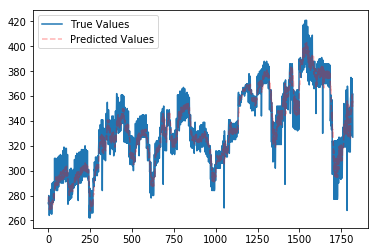

In [305]:
plt.plot(y)
plt.plot(yhat, 'r--', alpha = 0.3)
plt.legend(['True Values', 'Predicted Values'])

In [ ]:
from sklearn.metrics import mean_squared_error

In [307]:
np.sqrt(mean_squared_error(y, yhat))

8.71367875963103

Predicting 7 days into the future. Looking back a month

In [308]:

# univariate multi-step vector-output stacked lstm example
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
 
# split a univariate sequence into samples
def split_sequence(sequence, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        # check if we are beyond the sequence
        if out_end_ix > len(sequence):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)
 
# define input sequence
raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]
# choose a number of time steps
n_steps_in, n_steps_out = 30, 7
# split into samples
X, y = split_sequence(flights.Total[:-37], n_steps_in, n_steps_out)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
# define model
model = Sequential()
model.add(LSTM(150, activation='relu', return_sequences=True, input_shape=(n_steps_in, n_features)))
model.add(LSTM(150, activation='relu'))
model.add(Dense(n_steps_out))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=50, verbose=0)
# demonstrate prediction


In [309]:
X[0].shape, y[0].shape

((30, 1), (7,))

In [310]:
flights.Total[-30:].shape

(30,)

In [311]:
flights.Total[-31:]

Date
2008-12-01    357
2008-12-02    346
2008-12-03    326
2008-12-04    334
2008-12-05    340
2008-12-06    350
2008-12-07    327
2008-12-08    336
2008-12-09    315
2008-12-10    318
2008-12-11    334
2008-12-12    341
2008-12-13    351
2008-12-14    328
2008-12-15    335
2008-12-16    315
2008-12-17    338
2008-12-18    358
2008-12-19    360
2008-12-20    375
2008-12-21    350
2008-12-22    359
2008-12-23    361
2008-12-24    328
2008-12-25    334
2008-12-26    362
2008-12-27    374
2008-12-28    352
2008-12-29    361
2008-12-30    362
2008-12-31    327
Name: Total, dtype: int64

In [312]:
X, y = split_sequence(np.array(flights.Total[-37:]), n_steps_in, n_steps_out)

In [313]:
X, y

(array([[357, 360, 268, 328, 368, 365, 357, 346, 326, 334, 340, 350, 327,
         336, 315, 318, 334, 341, 351, 328, 335, 315, 338, 358, 360, 375,
         350, 359, 361, 328]], dtype=int64),
 array([[334, 362, 374, 352, 361, 362, 327]], dtype=int64))

In [314]:
len(X)

1

In [315]:
x_input = array(X)
x_input = x_input.reshape((1, n_steps_in, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[341.12155 352.04626 352.24966 351.42923 349.42154 349.63434 354.0855 ]]


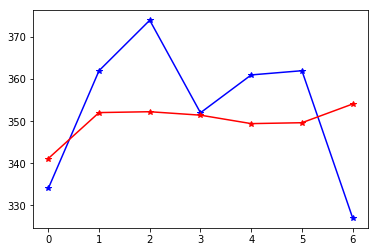

In [316]:
plt.plot(y.ravel(), 'b-', marker = '*')
plt.plot(yhat.ravel(), 'r-', marker = '*')

# Compute Root Mean Squared Error

In [317]:
np.sqrt(mean_squared_error(yhat, y))

15.324077366531316

** The model predicts on average 